In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

font_size = 30
font_size_ticks = 25

np.set_printoptions(precision=5)

def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

file_path = "./data/weather/hourly_precipitation_2015.npy"

# data_matrix contains precipitation data from 134 stations (each station is a column)
data_matrix = np.load(file_path)

print(data_matrix.shape) 
print(data_matrix[25:35,:10])

(8760, 134)
[[0.  1.  0.3 0.7 0.  0.2 1.  0.2 0.  0.4]
 [0.  0.4 0.2 0.3 0.  0.6 1.9 1.1 0.  0. ]
 [0.  0.6 0.  0.  0.  0.2 0.7 1.1 0.  0. ]
 [0.  0.2 0.  0.  0.  0.  0.4 0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 0.  0.  0. ]
 [0.  0.  0.6 0.2 0.  0.  0.5 0.2 0.  0.7]
 [0.  0.  0.9 0.9 0.  0.  1.3 0.  0.  0.6]
 [0.  0.3 0.6 1.2 0.  0.4 1.9 0.  0.  0.2]
 [0.  0.  0.3 0.  0.  0.6 0.6 0.4 0.  0.6]
 [0.  0.  0.5 0.  0.  0.2 0.5 0.6 0.  0.3]]


In [2]:
# We select three stations to study, stations contains the corresponding indices in data_matrix
# 24: Bodega, CA
# 99: Coos Bay, OR
# 102: Riley, OR
stations = [24,99,102]

In [3]:
# Compute joint pmf of three Bernoulli random variables indicating whether it rains (1) or not (0)
# in Bodega, Coos Bay and Riley
def compute_joint_pmf(station_1,station_2,station_3,data_matrix):
    counts = np.empty(8)
    
    for i in range(2):
        for j in range(2):
            for k in range(2):
                count = 0
                for m in range(np.shape(data_matrix)[0]):
                    if (data_matrix[m,station_3] > 0) == k and (data_matrix[m,station_2] > 0) == j and (data_matrix[m,station_1] > 0) == i:
                        count+=1
                counts[4*i+2*j+k] = float(count)
    joint_pmf = counts/np.sum(counts)
    return counts, joint_pmf
                    
counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)
print(counts)
print(joint_pmf)

[7472.  186.  814.   89.   88.   21.   75.   15.]
[0.85297 0.02123 0.09292 0.01016 0.01005 0.0024  0.00856 0.00171]


[0.97728 0.02272]
[0.88664 0.11336]
[0.9645 0.0355]


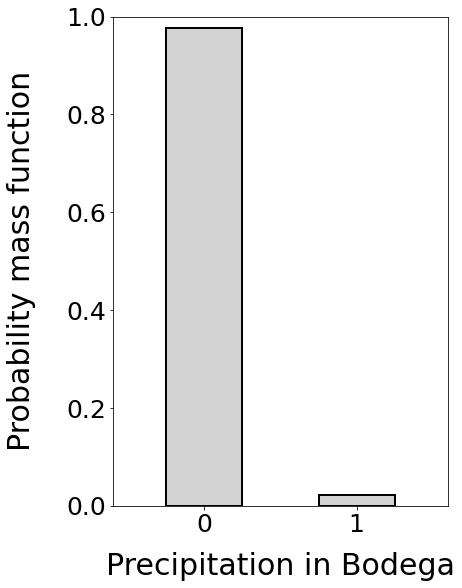

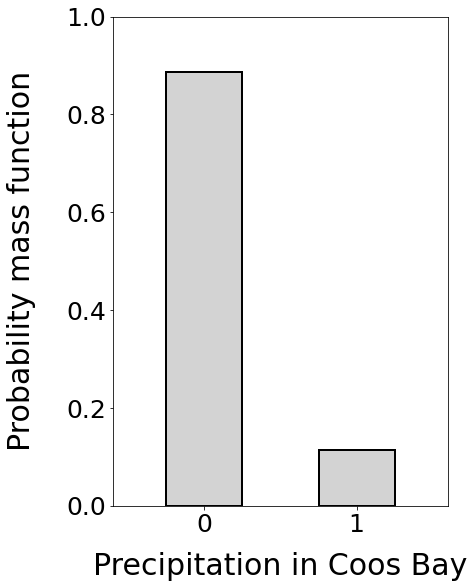

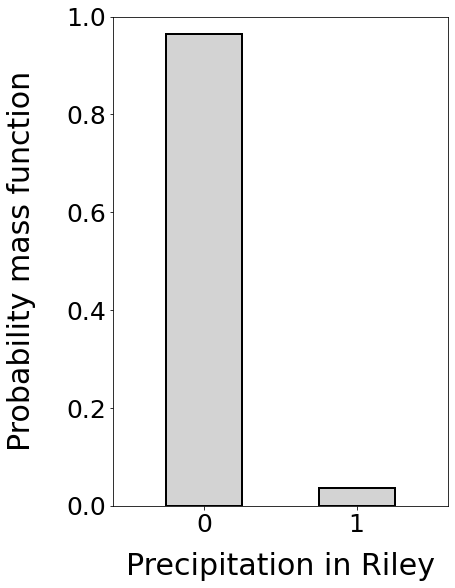

In [10]:
# Compute marginal pmf of each of the Bernoulli random variables 
def marginal_1_station(joint_pmf):
    marginal_pmf_1 = np.array([np.sum(joint_pmf[[0,1,2,3]]), np.sum(joint_pmf[[4,5,6,7]])])
    marginal_pmf_2 = np.array([np.sum(joint_pmf[[0,1,4,5]]), np.sum(joint_pmf[[2,3,6,7]])])
    marginal_pmf_3 = np.array([np.sum(joint_pmf[[0,2,4,6]]), np.sum(joint_pmf[[1,3,5,7]])])
    return marginal_pmf_1, marginal_pmf_2, marginal_pmf_3
marginal_pmf_1,marginal_pmf_2,marginal_pmf_3 = marginal_1_station(joint_pmf)
print(marginal_pmf_1)
print(marginal_pmf_2)
print(marginal_pmf_3)

vals = [0,1]
ymax = 1.0
xmin = -0.6
xmax = 1.6
plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_1, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_1.jpg',bbox_inches="tight")

plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_2, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_2.jpg',bbox_inches="tight")

plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_3, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_3.jpg',bbox_inches="tight")

In [11]:
# Compute marginal joint pmf of each pair of the Bernoulli random variables 
def marginal_2_stations(joint_pmf):
    marginal_pmf_12 = np.array([np.sum(joint_pmf[[0,1]]), np.sum(joint_pmf[[2,3]]), np.sum(joint_pmf[[4,5]]), np.sum(joint_pmf[[6,7]])])
    marginal_pmf_13 = np.array([np.sum(joint_pmf[[0,2]]), np.sum(joint_pmf[[1,3]]), np.sum(joint_pmf[[4,6]]), np.sum(joint_pmf[[5,7]])])
    marginal_pmf_23 = np.array([np.sum(joint_pmf[[0,4]]), np.sum(joint_pmf[[1,5]]), np.sum(joint_pmf[[2,6]]), np.sum(joint_pmf[[3,7]])])
    return marginal_pmf_12, marginal_pmf_13, marginal_pmf_23
    
marginal_pmf_12,marginal_pmf_13,marginal_pmf_23 = marginal_2_stations(joint_pmf)

print(marginal_pmf_12)
print(marginal_pmf_13)
print(marginal_pmf_23)

[0.8742  0.10308 0.01244 0.01027]
[0.94589 0.03139 0.01861 0.00411]
[0.86301 0.02363 0.10148 0.01187]


[0.98836 0.01164]
[0.89855 0.10145]
[0.91564 0.08436]
[0.85577 0.14423]
[0.90176 0.09824]
[0.67636 0.32364]
[0.53988 0.46012]
[0.58333 0.41667]
[0.97571 0.02429]
[0.90144 0.09856]
[0.80734 0.19266]
[0.83333 0.16667]


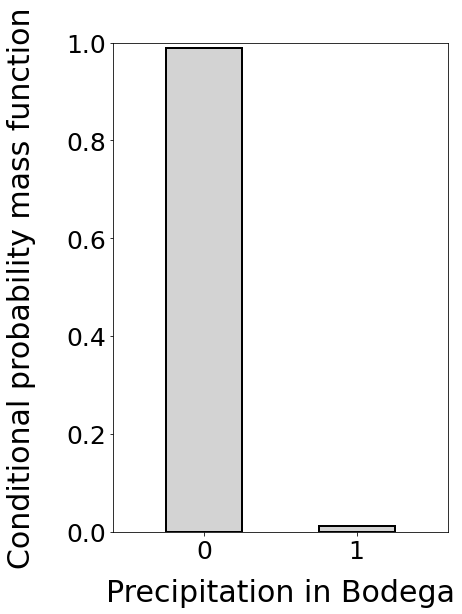

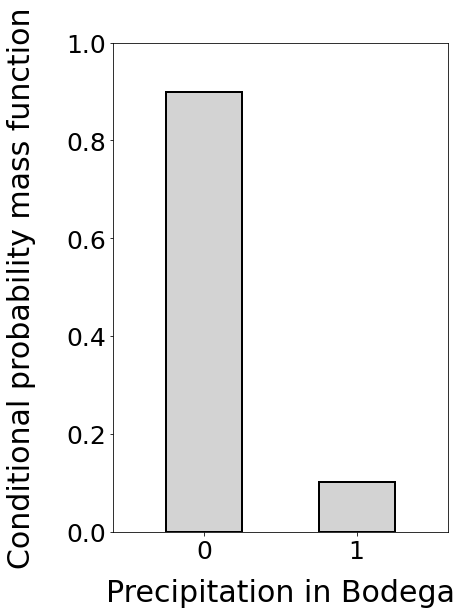

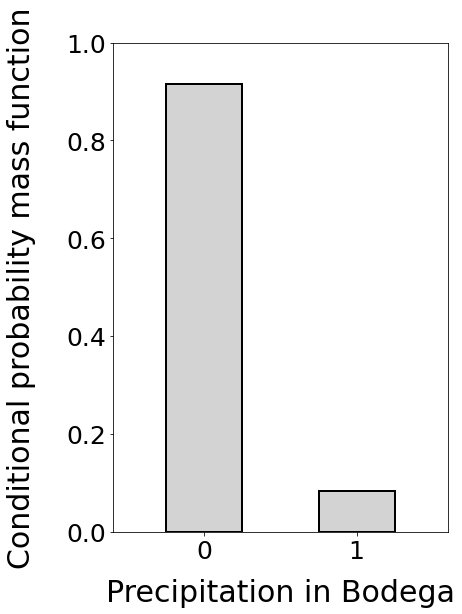

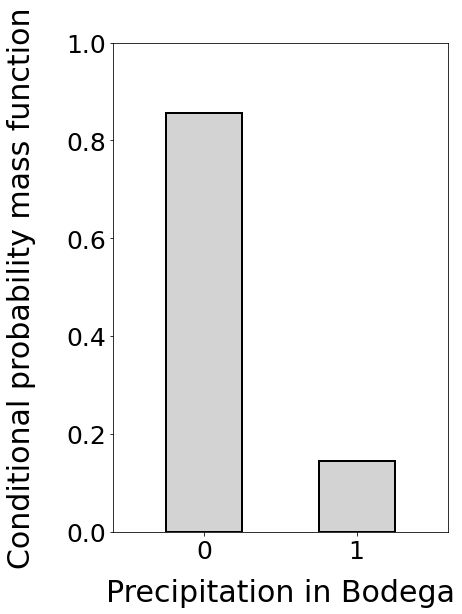

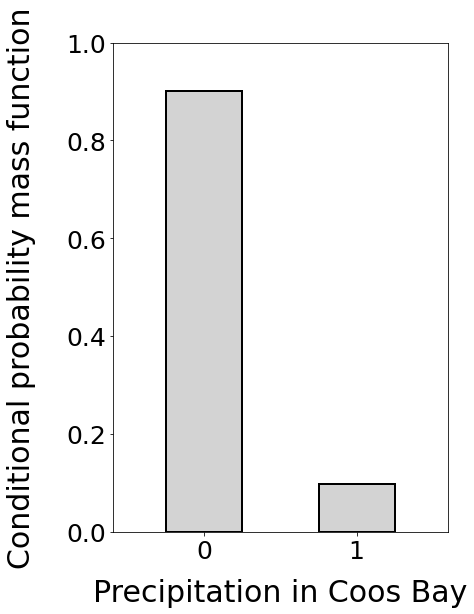

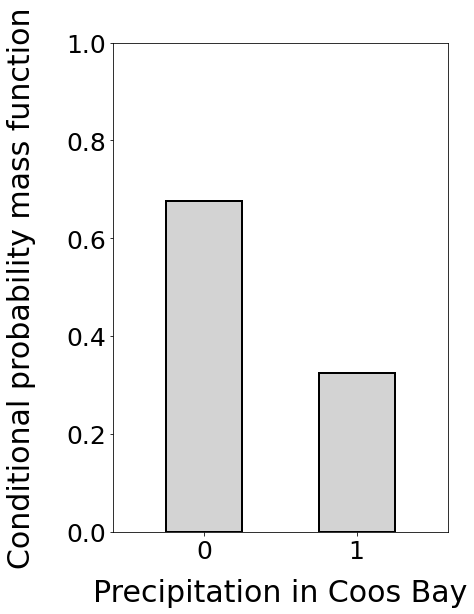

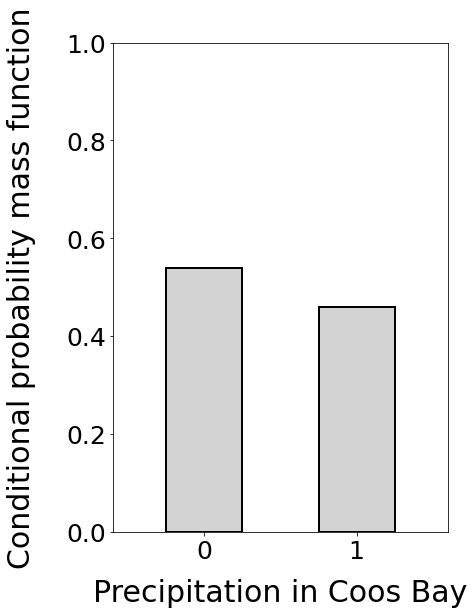

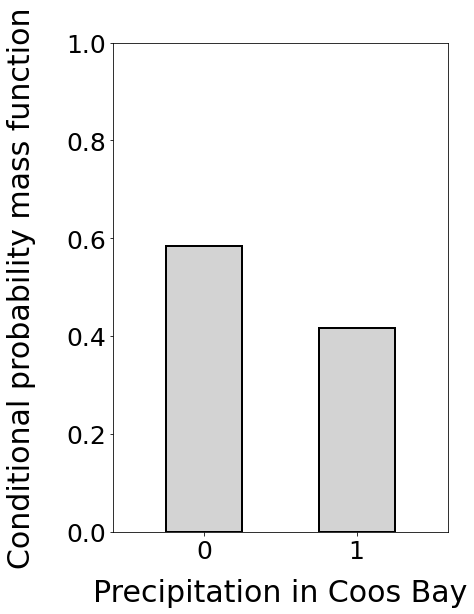

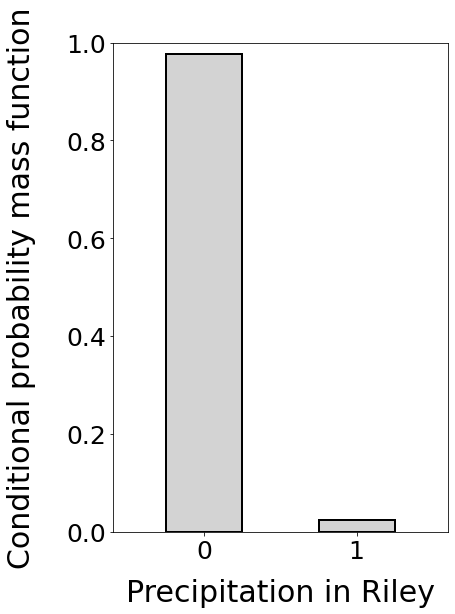

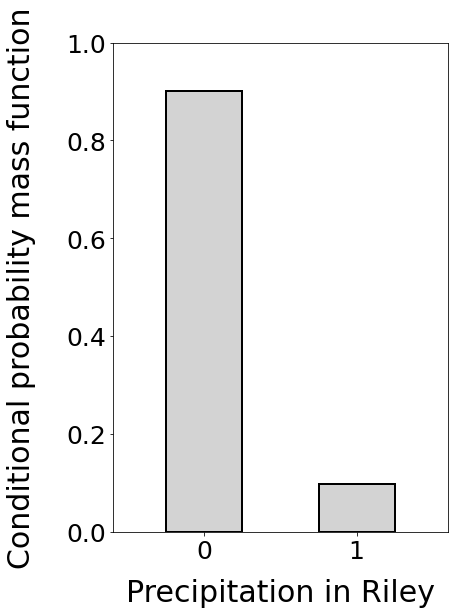

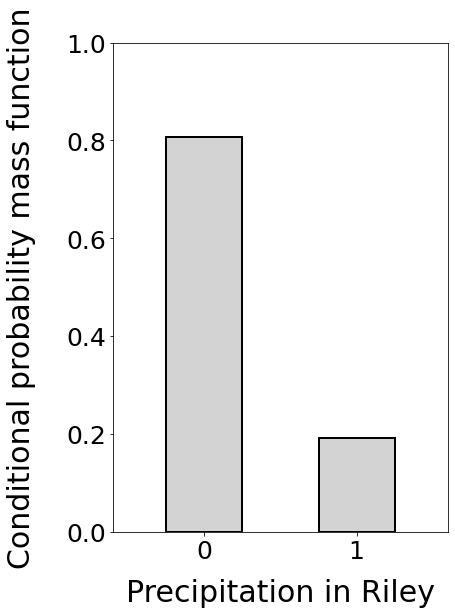

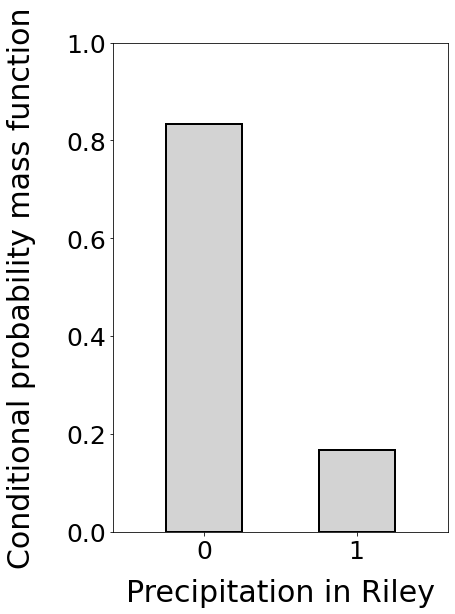

In [13]:
# Compute conditional pmf of each of the Bernoulli random variables given the other two 
def conditional_1_station_given_2(joint_pmf):
    cond_1_given_23 = np.zeros((2,2,2))
    cond_1_given_23[0,0] = np.array([joint_pmf[0]/(joint_pmf[0]+joint_pmf[4]), joint_pmf[4]/(joint_pmf[0]+joint_pmf[4])])
    cond_1_given_23[0,1] = np.array([joint_pmf[1]/(joint_pmf[1]+joint_pmf[5]), joint_pmf[5]/(joint_pmf[1]+joint_pmf[5])])
    cond_1_given_23[1,0] = np.array([joint_pmf[2]/(joint_pmf[2]+joint_pmf[6]), joint_pmf[6]/(joint_pmf[2]+joint_pmf[6])])
    cond_1_given_23[1,1] = np.array([joint_pmf[3]/(joint_pmf[3]+joint_pmf[7]), joint_pmf[7]/(joint_pmf[3]+joint_pmf[7])])
    cond_2_given_13 = np.zeros((2,2,2))
    cond_2_given_13[0,0] = np.array([joint_pmf[0]/(joint_pmf[0]+joint_pmf[2]), joint_pmf[2]/(joint_pmf[0]+joint_pmf[2])])
    cond_2_given_13[0,1] = np.array([joint_pmf[1]/(joint_pmf[1]+joint_pmf[3]), joint_pmf[3]/(joint_pmf[1]+joint_pmf[3])])
    cond_2_given_13[1,0] = np.array([joint_pmf[4]/(joint_pmf[4]+joint_pmf[6]), joint_pmf[6]/(joint_pmf[4]+joint_pmf[6])])
    cond_2_given_13[1,1] = np.array([joint_pmf[5]/(joint_pmf[5]+joint_pmf[7]), joint_pmf[7]/(joint_pmf[5]+joint_pmf[7])])
    cond_3_given_12 = np.zeros((2,2,2))
    cond_3_given_12[0,0] = np.array([joint_pmf[0]/(joint_pmf[0]+joint_pmf[1]), joint_pmf[1]/(joint_pmf[0]+joint_pmf[1])])
    cond_3_given_12[0,1] = np.array([joint_pmf[2]/(joint_pmf[2]+joint_pmf[3]), joint_pmf[3]/(joint_pmf[2]+joint_pmf[3])])
    cond_3_given_12[1,0] = np.array([joint_pmf[4]/(joint_pmf[4]+joint_pmf[5]), joint_pmf[5]/(joint_pmf[4]+joint_pmf[5])])
    cond_3_given_12[1,1] = np.array([joint_pmf[6]/(joint_pmf[6]+joint_pmf[7]), joint_pmf[7]/(joint_pmf[6]+joint_pmf[7])])
    return cond_1_given_23,cond_2_given_13,cond_3_given_12

cond_1_given_23,cond_2_given_13,cond_3_given_12 = conditional_1_station_given_2(joint_pmf)

for ind_2 in range(2):
    for ind_3 in range(2):
        print(cond_1_given_23[ind_2][ind_3])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_1_given_23[ind_2][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_1_given_2eq'+str(ind_2)+'_3eq'+str(ind_3)+'.jpg',bbox_inches="tight")

for ind_1 in range(2):
    for ind_3 in range(2):
        print(cond_2_given_13[ind_1][ind_3])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_2_given_13[ind_1][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_2_given_1eq'+str(ind_1)+'_3eq'+str(ind_3)+'.jpg',bbox_inches="tight")

for ind_1 in range(2):
    for ind_2 in range(2):
        print(cond_3_given_12[ind_1][ind_2])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_3_given_12[ind_1][ind_2], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_3_given_1eq'+str(ind_1)+'_2eq'+str(ind_2)+'.jpg',bbox_inches="tight")


In [14]:
# Compute conditional joint pmf of each pair of the Bernoulli random variables given the other one
def conditional_2_stations_given_1(joint_pmf):
    cond_12_given_3 = np.zeros((2,4))
    cond_12_given_3[0] = np.array([joint_pmf[0]/marginal_pmf_3[0], joint_pmf[2]/marginal_pmf_3[0], joint_pmf[4]/marginal_pmf_3[0], joint_pmf[6]/marginal_pmf_3[0]])
    cond_12_given_3[1] = np.array([joint_pmf[1]/marginal_pmf_3[1], joint_pmf[3]/marginal_pmf_3[1], joint_pmf[5]/marginal_pmf_3[1], joint_pmf[7]/marginal_pmf_3[1]])
    cond_13_given_2 = np.zeros((2,4))
    cond_13_given_2[0] = np.array([joint_pmf[0]/marginal_pmf_2[0], joint_pmf[1]/marginal_pmf_2[0], joint_pmf[4]/marginal_pmf_2[0], joint_pmf[5]/marginal_pmf_2[0]])
    cond_13_given_2[1] = np.array([joint_pmf[2]/marginal_pmf_2[1], joint_pmf[3]/marginal_pmf_2[1], joint_pmf[6]/marginal_pmf_2[1], joint_pmf[7]/marginal_pmf_2[1]])    
    cond_23_given_1 = np.zeros((2,4))
    cond_23_given_1[0] = np.array([joint_pmf[0]/marginal_pmf_1[0], joint_pmf[1]/marginal_pmf_1[0], joint_pmf[2]/marginal_pmf_1[0], joint_pmf[3]/marginal_pmf_1[0]])
    cond_23_given_1[1] = np.array([joint_pmf[4]/marginal_pmf_1[1], joint_pmf[5]/marginal_pmf_1[1], joint_pmf[6]/marginal_pmf_1[1], joint_pmf[7]/marginal_pmf_1[1]])
    return cond_12_given_3, cond_13_given_2, cond_23_given_1

cond_12_given_3,cond_13_given_2,cond_23_given_1 = conditional_2_stations_given_1(joint_pmf)

for ind in range(2):
    print(cond_12_given_3[ind])
for ind in range(2):
    print(cond_13_given_2[ind])
for ind in range(2):
    print(cond_23_given_1[ind])

[0.88437 0.09634 0.01042 0.00888]
[0.59807 0.28617 0.06752 0.04823]
[0.96202 0.02395 0.01133 0.0027 ]
[0.81974 0.08963 0.07553 0.01511]
[0.8728  0.02173 0.09508 0.0104 ]
[0.44221 0.10553 0.37688 0.07538]


{'2': array([[0.98597, 0.01403],
       [0.90937, 0.09063]]), '3': array([[0.98071, 0.01929],
       [0.88424, 0.11576]])}
{'1': array([[0.89452, 0.10548],
       [0.54774, 0.45226]]), '3': array([[0.89478, 0.10522],
       [0.66559, 0.33441]])}
{'1': array([[0.96788, 0.03212],
       [0.8191 , 0.1809 ]]), '2': array([[0.97335, 0.02665],
       [0.89527, 0.10473]])}


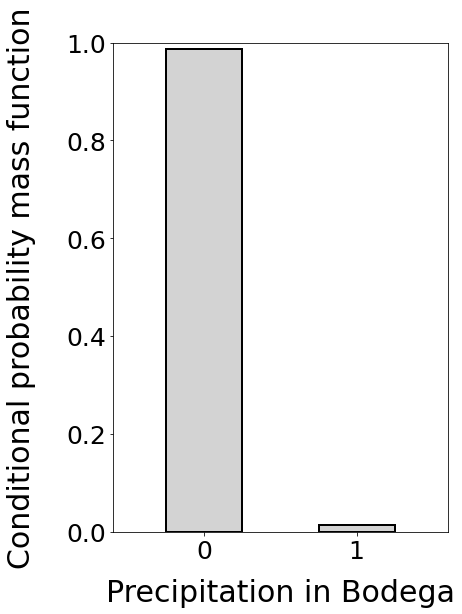

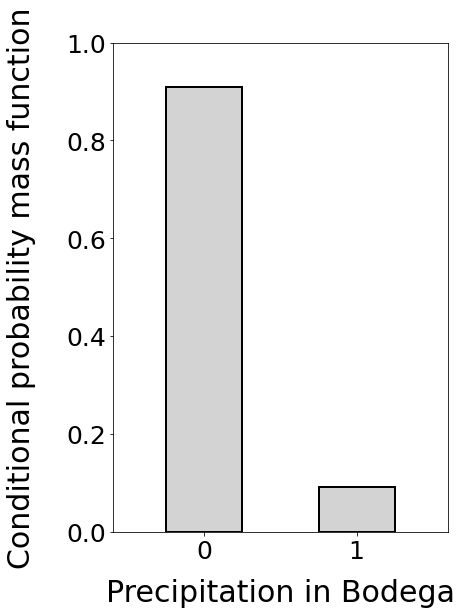

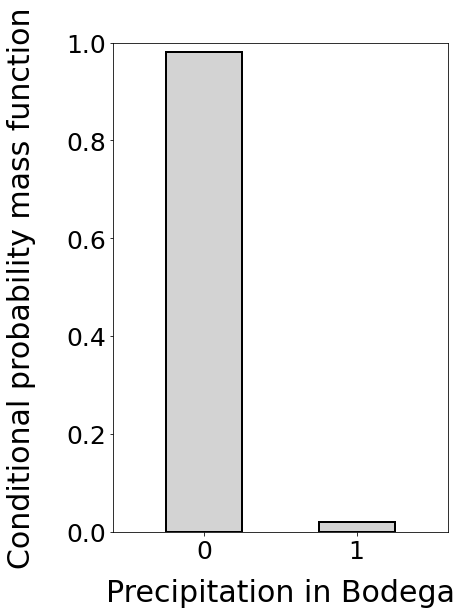

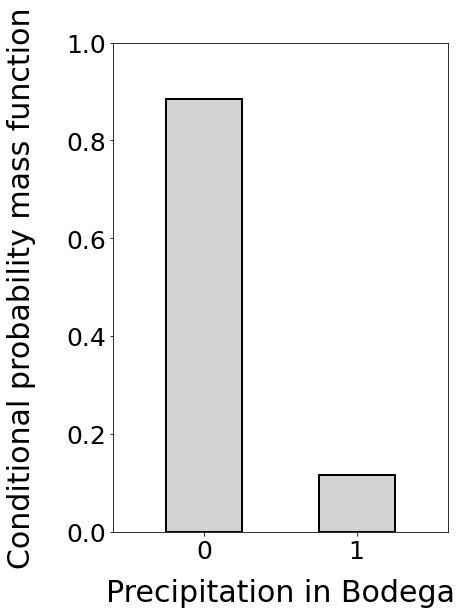

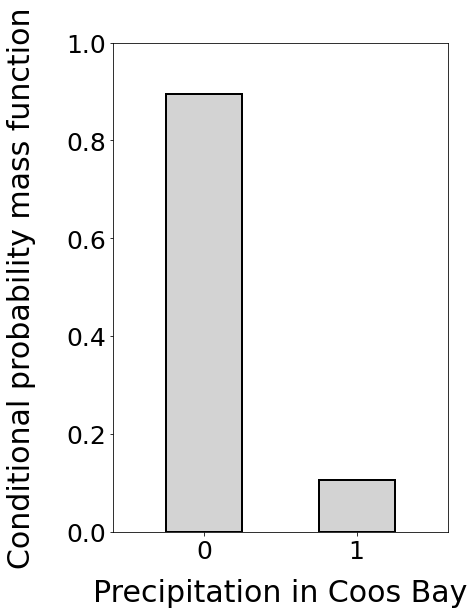

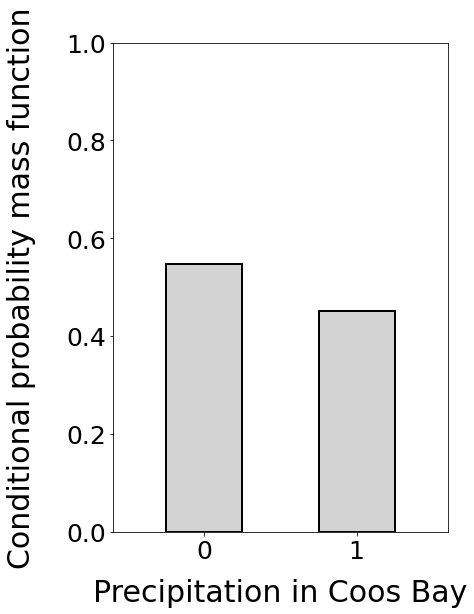

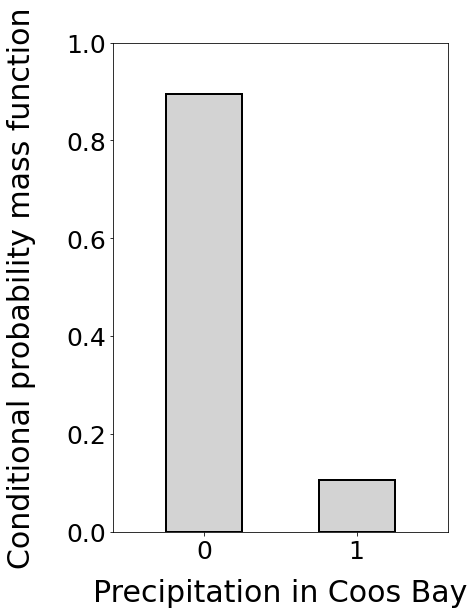

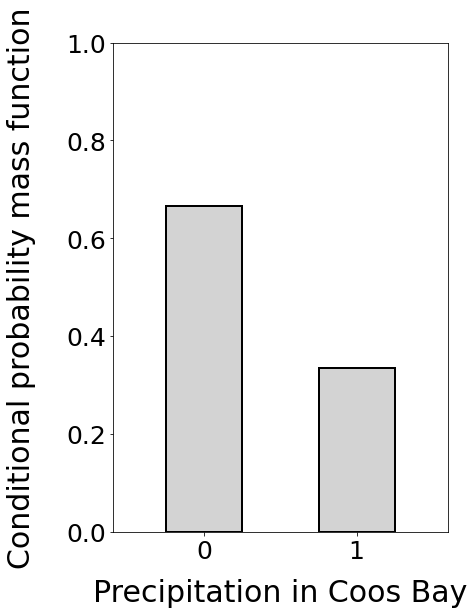

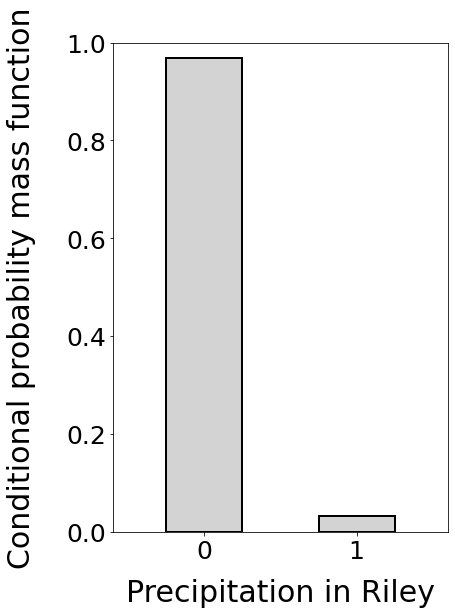

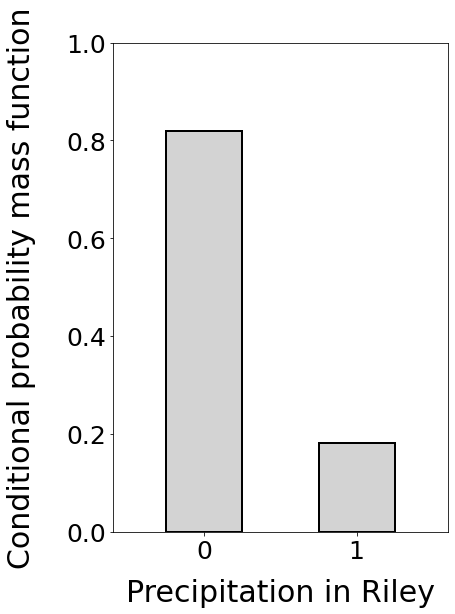

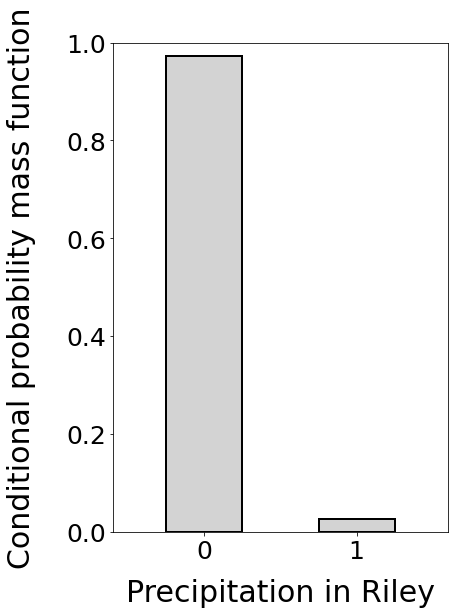

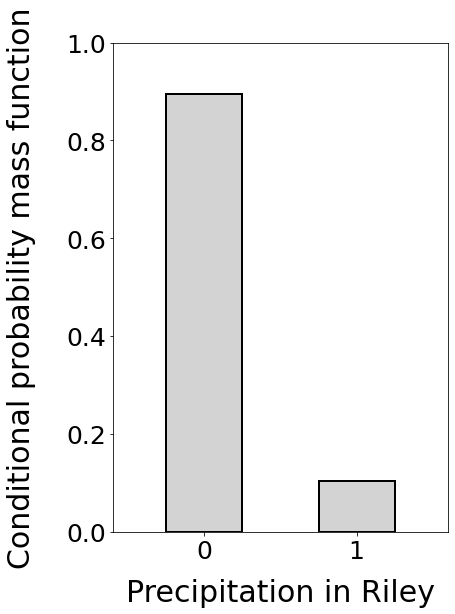

In [16]:
# Compute conditional pmf of each Bernoulli random variable given each of the other ones 
# (i.e. Bodega just conditioned on Coos Bay, Bodega just conditioned on Riley, etc.)
# Use a dictionary to save the conditional pmfs, for example cond_1["2"] should contain the conditional of the
# first random variable (Bodega)
def conditional_1_station_given_1_station(joint_pmf):
    a = joint_pmf[0]
    b = joint_pmf[1]
    c = joint_pmf[2]
    d = joint_pmf[3]
    e = joint_pmf[4]
    f = joint_pmf[5]
    g = joint_pmf[6]
    h = joint_pmf[7]
    cond_1 = {}
    cond_1["2"] = np.array([[(a+b)/marginal_pmf_2[0], (e+f)/marginal_pmf_2[0]], [(c+d)/marginal_pmf_2[1], (g+h)/marginal_pmf_2[1]]])
    cond_1["3"] = np.array([[(a+c)/marginal_pmf_3[0], (e+g)/marginal_pmf_3[0]], [(b+d)/marginal_pmf_3[1], (f+h)/marginal_pmf_3[1]]])
    cond_2 = {}
    cond_2["1"] = np.array([[(a+b)/marginal_pmf_1[0], (c+d)/marginal_pmf_1[0]], [(e+f)/marginal_pmf_1[1], (g+h)/marginal_pmf_1[1]]])
    cond_2["3"] = np.array([[(a+e)/marginal_pmf_3[0], (c+g)/marginal_pmf_3[0]], [(b+f)/marginal_pmf_3[1], (d+h)/marginal_pmf_3[1]]])
    cond_3 = {}
    cond_3["1"] = np.array([[(a+c)/marginal_pmf_1[0], (b+d)/marginal_pmf_1[0]], [(e+g)/marginal_pmf_1[1], (f+h)/marginal_pmf_1[1]]])
    cond_3["2"] = np.array([[(a+e)/marginal_pmf_2[0], (b+f)/marginal_pmf_2[0]], [(c+g)/marginal_pmf_2[1], (d+h)/marginal_pmf_2[1]]])
    return cond_1, cond_2, cond_3

cond_1,cond_2,cond_3 = conditional_1_station_given_1_station(joint_pmf)

print(cond_1)
print(cond_2)
print(cond_3)

for given in ["2","3"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_1[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_1_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")
        
for given in ["1","3"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_2[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_2_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")

for given in ["1","2"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_3[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_3_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")
